<a href="https://colab.research.google.com/github/DaveChui/Decision-Trees-ML/blob/main/Decision_Trees_and_SVM_Dave_Njoroge_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Trees and Support Vector Machine
### 1. Defining the Question
####a.) Specifying the Question
Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

#### b.) Determining the metric for success
While solving the specified problem, we should be able to create a model(s) which will be able to inform us of the hypothyroidism status of a specific patient which should have an accuracy of more than 90%.

#### c.) Understanding the context
Using the medical field dataset provided, we're supposed to predict with the highest accuracy level whether a person has hypothyroidism or not which will be a matter of high imprortance.
This is a Hypothyroidism's deficiency of thyroid hormones which can disrupt things like heart rate, body temperature and all aspects of metabolism.
Major symptoms include fatigue, cold sensitivity, constipation, dry skin and unexplained weight gain. Treatment consists of thyroid hormone replacement.

#### d.) Recording the experimental design
###### i.)Reading Data
###### ii.)Checking the Data
##### iii.)Cleaning the Data
##### iv.)Exploratory Analysis
##### v.)Implementing the solution
##### vi.)Challenging the solution
##### vii.)Follow up questions

#### e.) Data Relevance
The various data fields can be better understood and validated from the following link. http://archive.ics.uci.edu/ml/datasets/Thyroid+Disease

Age
Age of the patient (0.01–0.97). Continuous variable.

Sex
Sex of the patient, 0 (Male) 1 (Female). Binary variable.

On_thyroxine
0 (FALSE) 1 (TRUE). Binary variable.

Query_on_thyroxine
0 (FALSE) 1 (TRUE). Binary variable.

On_antithyroid_medication
0 (FALSE) 1 (TRUE). Binary variable.

Sick
0 (FALSE) 1 (TRUE). Binary variable.

Pregnant
0 (FALSE) 1 (TRUE). Binary variable.

Thyroid_surgery
0 (FALSE) 1 (TRUE). Binary variable.

I131_treatment
0 (FALSE) 1 (TRUE). Binary variable.

Query_hypothyroid
0 (FALSE) 1 (TRUE). Binary variable.

Query_hyperthyroid
0 (FALSE) 1 (TRUE). Binary variable.

Lithium
0 (FALSE) 1 (TRUE). Binary variable.

Goitre
0 (FALSE) 1 (TRUE). Binary variable.

Tumor
0 (FALSE) 1 (TRUE). Binary variable.

Hypopituitary
0 (FALSE) 1 (TRUE). Binary variable.

Psych
0 (FALSE) 1 (TRUE). Binary variable.

TSH
amount of TSH (0.0–0.53). Continuous variable.

T3
amount of T3 (0.0005–0.18). Continuous variable.

TT4
amount of TT4 (0.002–0.6). Continuous variable.

T4U
amount of T4U (0.017–0.233). Continuous variable.

FTI
amount of FTI (0.002–0.642). Continuous variable.

Class
1 (normal) 2 (hyperthyroidism) 3 (hypothyroidism). Class variable.

#####Importing the necessary libraries

In [5]:
# Importing relevant libraries

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

### 2.) Reading and checking the data

In [6]:
# Loading the Dataset


hypothyroid = pd.read_csv("/content/hypothyroid.csv")
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
#Checking our dataset

hypothyroid.shape

(3163, 26)

In [ ]:
#get numerical statistics about data
hypothyroid.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,...,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,...,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,...,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,...,2468,695,2914,249,2915,248,2916,247,2903,2903


In [ ]:
hypothyroid.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [ ]:
# Previewing the top of our dataset
#
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
# Previewing the bottom of our dataset
# 
hypothyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
# Checking whether each column has an appropriate datatype
#

hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [ ]:
#Checking the dataset columns
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
# Making sure that our dataframe has the appropriate datatype
# First we use labelencoder to convert the categorical variables into numerical variables
#

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
hypothyroid['FTI_measured'] = lb_make.fit_transform(hypothyroid['FTI_measured']) 
hypothyroid['sex'] = lb_make.fit_transform(hypothyroid['sex'])
hypothyroid['on_thyroxine'] = lb_make.fit_transform(hypothyroid['on_thyroxine'])
hypothyroid['query_on_thyroxine'] = lb_make.fit_transform(hypothyroid['query_on_thyroxine'])
hypothyroid['on_antithyroid_medication'] = lb_make.fit_transform(hypothyroid['on_antithyroid_medication'])
hypothyroid['query_hypothyroid'] = lb_make.fit_transform(hypothyroid['query_hypothyroid'])
hypothyroid['query_hyperthyroid'] = lb_make.fit_transform(hypothyroid['query_hyperthyroid'])
hypothyroid['pregnant'] = lb_make.fit_transform(hypothyroid['pregnant'])
hypothyroid['sick'] = lb_make.fit_transform(hypothyroid['sick'])
hypothyroid['tumor'] = lb_make.fit_transform(hypothyroid['tumor'])
hypothyroid['lithium'] = lb_make.fit_transform(hypothyroid['lithium'])
hypothyroid['goitre'] = lb_make.fit_transform(hypothyroid['goitre'])
hypothyroid['TSH_measured'] = lb_make.fit_transform(hypothyroid['TSH_measured'])
hypothyroid['T3_measured'] = lb_make.fit_transform(hypothyroid['T3_measured'])
hypothyroid['TT4_measured'] = lb_make.fit_transform(hypothyroid['TT4_measured'])
hypothyroid['T4U_measured'] = lb_make.fit_transform(hypothyroid['T4U_measured'])
hypothyroid['FTI_measured'] = lb_make.fit_transform(hypothyroid['FTI_measured'])
hypothyroid['TBG_measured'] = lb_make.fit_transform(hypothyroid['TBG_measured'])
hypothyroid['thyroid_surgery'] = lb_make.fit_transform(hypothyroid['thyroid_surgery'])
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,...,1,0.60,1,15,1,1.48,1,10,0,?
1,hypothyroid,15,1,1,0,0,0,0,0,0,...,1,1.70,1,19,1,1.13,1,17,0,?
2,hypothyroid,24,2,0,0,0,0,0,0,0,...,1,0.20,1,4,1,1,1,0,0,?
3,hypothyroid,24,1,0,0,0,0,0,0,0,...,1,0.40,1,6,1,1.04,1,6,0,?
4,hypothyroid,77,2,0,0,0,0,0,0,0,...,1,1.20,1,57,1,1.28,1,44,0,?


In [ ]:
hypothyroid['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

In [ ]:
# Selecting the columns with object values to convert them later on
#

obj_df = hypothyroid.select_dtypes(include=['object']).copy()
obj_df.head()

,status,age,TSH,T3,TT4,T4U,FTI,TBG
0,hypothyroid,72,30,0.60,15,1.48,10,?
1,hypothyroid,15,145,1.70,19,1.13,17,?
2,hypothyroid,24,0,0.20,4,1,0,?
3,hypothyroid,24,430,0.40,6,1.04,6,?
4,hypothyroid,77,7.30,1.20,57,1.28,44,?


In [ ]:
hypothyroid["age"].replace({"?": 0}, inplace=True)
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,...,1,0.60,1,15,1,1.48,1,10,0,?
1,hypothyroid,15,1,1,0,0,0,0,0,0,...,1,1.70,1,19,1,1.13,1,17,0,?
2,hypothyroid,24,2,0,0,0,0,0,0,0,...,1,0.20,1,4,1,1,1,0,0,?
3,hypothyroid,24,1,0,0,0,0,0,0,0,...,1,0.40,1,6,1,1.04,1,6,0,?
4,hypothyroid,77,2,0,0,0,0,0,0,0,...,1,1.20,1,57,1,1.28,1,44,0,?


In [ ]:
hypothyroid["TSH"].replace({"?": 0}, inplace=True)
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,...,1,0.60,1,15,1,1.48,1,10,0,?
1,hypothyroid,15,1,1,0,0,0,0,0,0,...,1,1.70,1,19,1,1.13,1,17,0,?
2,hypothyroid,24,2,0,0,0,0,0,0,0,...,1,0.20,1,4,1,1,1,0,0,?
3,hypothyroid,24,1,0,0,0,0,0,0,0,...,1,0.40,1,6,1,1.04,1,6,0,?
4,hypothyroid,77,2,0,0,0,0,0,0,0,...,1,1.20,1,57,1,1.28,1,44,0,?


In [ ]:
hypothyroid["T3"].replace({"?": 0}, inplace=True)
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,...,1,0.60,1,15,1,1.48,1,10,0,?
1,hypothyroid,15,1,1,0,0,0,0,0,0,...,1,1.70,1,19,1,1.13,1,17,0,?
2,hypothyroid,24,2,0,0,0,0,0,0,0,...,1,0.20,1,4,1,1,1,0,0,?
3,hypothyroid,24,1,0,0,0,0,0,0,0,...,1,0.40,1,6,1,1.04,1,6,0,?
4,hypothyroid,77,2,0,0,0,0,0,0,0,...,1,1.20,1,57,1,1.28,1,44,0,?


In [ ]:
hypothyroid["TT4"].replace({"?": 0}, inplace=True)
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,...,1,0.60,1,15,1,1.48,1,10,0,?
1,hypothyroid,15,1,1,0,0,0,0,0,0,...,1,1.70,1,19,1,1.13,1,17,0,?
2,hypothyroid,24,2,0,0,0,0,0,0,0,...,1,0.20,1,4,1,1,1,0,0,?
3,hypothyroid,24,1,0,0,0,0,0,0,0,...,1,0.40,1,6,1,1.04,1,6,0,?
4,hypothyroid,77,2,0,0,0,0,0,0,0,...,1,1.20,1,57,1,1.28,1,44,0,?


In [ ]:
hypothyroid["T4U"].replace({"?": 0}, inplace=True)
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,...,1,0.60,1,15,1,1.48,1,10,0,?
1,hypothyroid,15,1,1,0,0,0,0,0,0,...,1,1.70,1,19,1,1.13,1,17,0,?
2,hypothyroid,24,2,0,0,0,0,0,0,0,...,1,0.20,1,4,1,1,1,0,0,?
3,hypothyroid,24,1,0,0,0,0,0,0,0,...,1,0.40,1,6,1,1.04,1,6,0,?
4,hypothyroid,77,2,0,0,0,0,0,0,0,...,1,1.20,1,57,1,1.28,1,44,0,?


In [ ]:
hypothyroid["FTI"].replace({"?": 0}, inplace=True)
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,...,1,0.60,1,15,1,1.48,1,10,0,?
1,hypothyroid,15,1,1,0,0,0,0,0,0,...,1,1.70,1,19,1,1.13,1,17,0,?
2,hypothyroid,24,2,0,0,0,0,0,0,0,...,1,0.20,1,4,1,1,1,0,0,?
3,hypothyroid,24,1,0,0,0,0,0,0,0,...,1,0.40,1,6,1,1.04,1,6,0,?
4,hypothyroid,77,2,0,0,0,0,0,0,0,...,1,1.20,1,57,1,1.28,1,44,0,?


In [ ]:
hypothyroid["TBG"].replace({"?": 0}, inplace=True)
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,...,1,0.60,1,15,1,1.48,1,10,0,0
1,hypothyroid,15,1,1,0,0,0,0,0,0,...,1,1.70,1,19,1,1.13,1,17,0,0
2,hypothyroid,24,2,0,0,0,0,0,0,0,...,1,0.20,1,4,1,1,1,0,0,0
3,hypothyroid,24,1,0,0,0,0,0,0,0,...,1,0.40,1,6,1,1.04,1,6,0,0
4,hypothyroid,77,2,0,0,0,0,0,0,0,...,1,1.20,1,57,1,1.28,1,44,0,0


In [ ]:
hypothyroid['TBG'].replace("None", 0, inplace=True)
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,...,1,0.60,1,15,1,1.48,1,10,0,0
1,hypothyroid,15,1,1,0,0,0,0,0,0,...,1,1.70,1,19,1,1.13,1,17,0,0
2,hypothyroid,24,2,0,0,0,0,0,0,0,...,1,0.20,1,4,1,1,1,0,0,0
3,hypothyroid,24,1,0,0,0,0,0,0,0,...,1,0.40,1,6,1,1.04,1,6,0,0
4,hypothyroid,77,2,0,0,0,0,0,0,0,...,1,1.20,1,57,1,1.28,1,44,0,0


In [ ]:
#Converting the fields to integer data type

hypothyroid['age'] = hypothyroid['age'].astype(int)
hypothyroid['TSH'] = hypothyroid['TSH'].astype(float)
hypothyroid['TSH'] = hypothyroid['TSH'].astype(int)
hypothyroid['T3'] = hypothyroid['T3'].astype(float)
hypothyroid['T3'] = hypothyroid['T3'].astype(int)
hypothyroid['TT4'] = hypothyroid['TT4'].astype(float)
hypothyroid['TT4'] = hypothyroid['TT4'].astype(int)
hypothyroid['T4U'] = hypothyroid['T4U'].astype(float)
hypothyroid['T4U'] = hypothyroid['T4U'].astype(int)
hypothyroid['FTI'] = hypothyroid['FTI'].astype(float)
hypothyroid['FTI'] = hypothyroid['FTI'].astype(int)
hypothyroid['TBG'] = hypothyroid['TBG'].astype(float)
hypothyroid['TBG'] = hypothyroid['TBG'].astype(int)

In [ ]:
#Checking the highest X item in the set

hypothyroid['TBG'].apply(np.floor)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3158    0.0
3159    0.0
3160    0.0
3161    0.0
3162    0.0
Name: TBG, Length: 3163, dtype: float64

In [ ]:
#Check our dataset's columns' data types to see the effected changes

hypothyroid.dtypes

status                       object
age                           int64
sex                           int64
on_thyroxine                  int64
query_on_thyroxine            int64
on_antithyroid_medication     int64
thyroid_surgery               int64
query_hypothyroid             int64
query_hyperthyroid            int64
pregnant                      int64
sick                          int64
tumor                         int64
lithium                       int64
goitre                        int64
TSH_measured                  int64
TSH                           int64
T3_measured                   int64
T3                            int64
TT4_measured                  int64
TT4                           int64
T4U_measured                  int64
T4U                           int64
FTI_measured                  int64
FTI                           int64
TBG_measured                  int64
TBG                           int64
dtype: object

## 3.) Cleaning the data

In [ ]:
#Checking the dataset columns
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

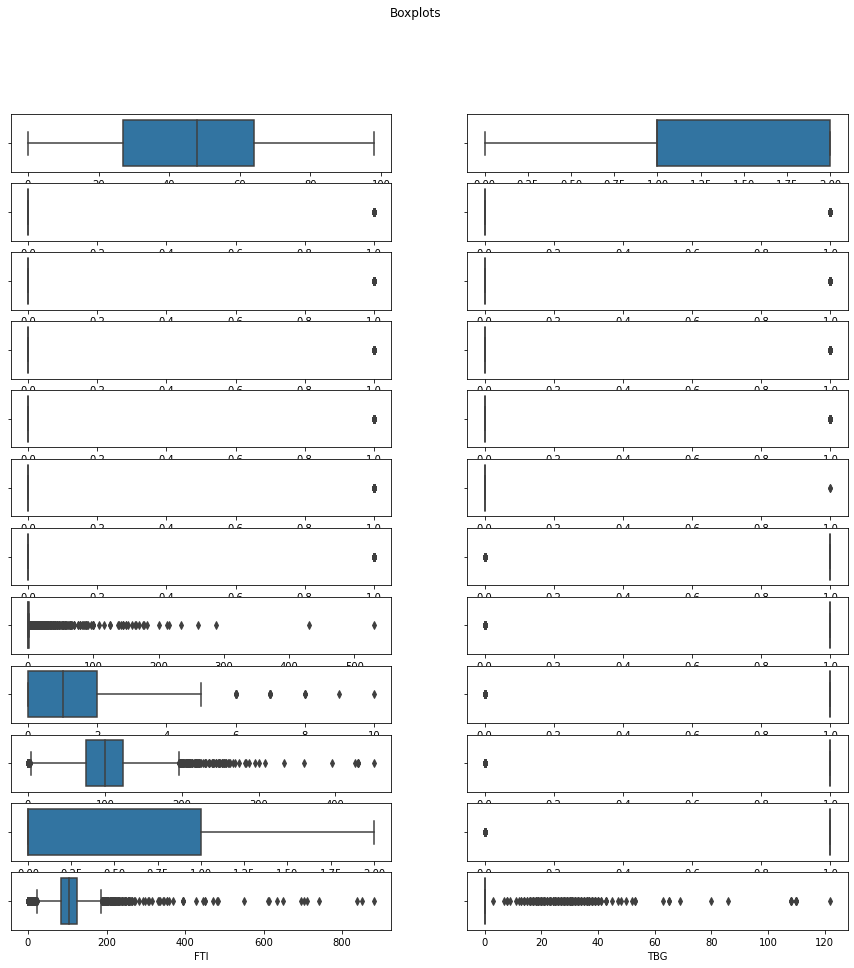

In [ ]:
# Checking for Outliers
#
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14), (ax15, ax16), (ax17, ax18), (ax19, ax20),(ax21,ax22),(ax23,ax24)) = plt.subplots(12,2, figsize=(15, 15))
fig.suptitle('Boxplots')

sns.boxplot(hypothyroid['age'], ax=ax1)
sns.boxplot(hypothyroid['sex'], ax=ax2)
sns.boxplot(hypothyroid['query_on_thyroxine'], ax=ax3)
sns.boxplot(hypothyroid['on_thyroxine'], ax=ax4)
sns.boxplot(hypothyroid['on_antithyroid_medication'], ax=ax5)
sns.boxplot(hypothyroid['thyroid_surgery'], ax=ax6)
sns.boxplot(hypothyroid['query_hypothyroid'], ax=ax7)
sns.boxplot(hypothyroid['query_hyperthyroid'], ax=ax8)
sns.boxplot(hypothyroid['pregnant'], ax=ax9)
sns.boxplot(hypothyroid['sick'], ax=ax10)
sns.boxplot(hypothyroid['tumor'], ax=ax11)
sns.boxplot(hypothyroid['lithium'], ax=ax12)
sns.boxplot(hypothyroid['goitre'], ax=ax13)
sns.boxplot(hypothyroid['TSH_measured'], ax=ax14)
sns.boxplot(hypothyroid['TSH'], ax=ax15)
sns.boxplot(hypothyroid['T3_measured'], ax=ax16)
sns.boxplot(hypothyroid['T3'], ax=ax17)
sns.boxplot(hypothyroid['TT4_measured'], ax=ax18)
sns.boxplot(hypothyroid['TT4'], ax=ax19)
sns.boxplot(hypothyroid['T4U_measured'], ax=ax20)
sns.boxplot(hypothyroid['T4U'], ax=ax21)
sns.boxplot(hypothyroid['FTI_measured'], ax=ax22)
sns.boxplot(hypothyroid['FTI'], ax=ax23)
sns.boxplot(hypothyroid['TBG'], ax=ax24)
plt.show()

In [ ]:
# Checking for Anomalies
#
# Check outliers using IQR Score
# Find the IQR Score first
Q1 = hypothyroid.quantile(0.25)
Q3 = hypothyroid.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                          37.0
sex                           1.0
on_thyroxine                  0.0
query_on_thyroxine            0.0
on_antithyroid_medication     0.0
thyroid_surgery               0.0
query_hypothyroid             0.0
query_hyperthyroid            0.0
pregnant                      0.0
sick                          0.0
tumor                         0.0
lithium                       0.0
goitre                        0.0
TSH_measured                  0.0
TSH                           1.0
T3_measured                   0.0
T3                            2.0
TT4_measured                  0.0
TT4                          48.0
T4U_measured                  0.0
T4U                           1.0
FTI_measured                  0.0
FTI                          41.0
TBG_measured                  0.0
TBG                           0.0
dtype: float64


In [ ]:
# Multiply the (IQR) by 1.5
# Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
# Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.

print(hypothyroid < (Q1 - 1.5 * IQR)) |(hypothyroid > (Q3 + 1.5 * IQR))

# True indicates the presence of an outlier

        FTI  FTI_measured     T3  T3_measured    T4U  T4U_measured    TBG  \
0      True         False  False        False  False         False  False   
1      True         False  False        False  False         False  False   
2      True         False  False        False  False         False  False   
3      True         False  False        False  False         False  False   
4     False         False  False        False  False         False  False   
...     ...           ...    ...          ...    ...           ...    ...   
3158  False         False  False        False  False         False  False   
3159  False         False  False        False  False         False  False   
3160  False         False  False        False  False         False  False   
3161  False         False  False        False  False         False  False   
3162  False         False  False        False  False         False  False   

      TBG_measured    TSH  TSH_measured  ...  on_thyroxine  pregnant  \
0  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


TypeError: ignored

In [ ]:
# Remove the outliers
hypothyroid = hypothyroid[~((hypothyroid < (Q1 - 1.5 * IQR)) |(hypothyroid > (Q3 + 1.5 * IQR))).any(axis=1)]
hypothyroid.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


(1222, 26)

In [ ]:
# Checking again if we still have outliers just in case before we proceed with other analyses

print(hypothyroid < (Q1 - 1.5 * IQR)) |(hypothyroid > (Q3 + 1.5 * IQR))

# There are no more outliers, the boolean value True has disappeared and we are anly remaining with false values.

        FTI  FTI_measured     T3  T3_measured    T4U  T4U_measured    TBG  \
151   False         False  False        False  False         False  False   
153   False         False  False        False  False         False  False   
154   False         False  False        False  False         False  False   
156   False         False  False        False  False         False  False   
158   False         False  False        False  False         False  False   
...     ...           ...    ...          ...    ...           ...    ...   
3155  False         False  False        False  False         False  False   
3157  False         False  False        False  False         False  False   
3159  False         False  False        False  False         False  False   
3160  False         False  False        False  False         False  False   
3161  False         False  False        False  False         False  False   

      TBG_measured    TSH  TSH_measured  ...  on_thyroxine  pregnant  \
151

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: ignored

In [ ]:
hypothyroid['status'].unique()

array(['negative'], dtype=object)

In [ ]:
# Identifying the Missing Data
#

hypothyroid.isnull().sum()

# Our data does not have any null values.

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

### 4.) Exploratory Data Analysis

In [ ]:
#Viewing our columns
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

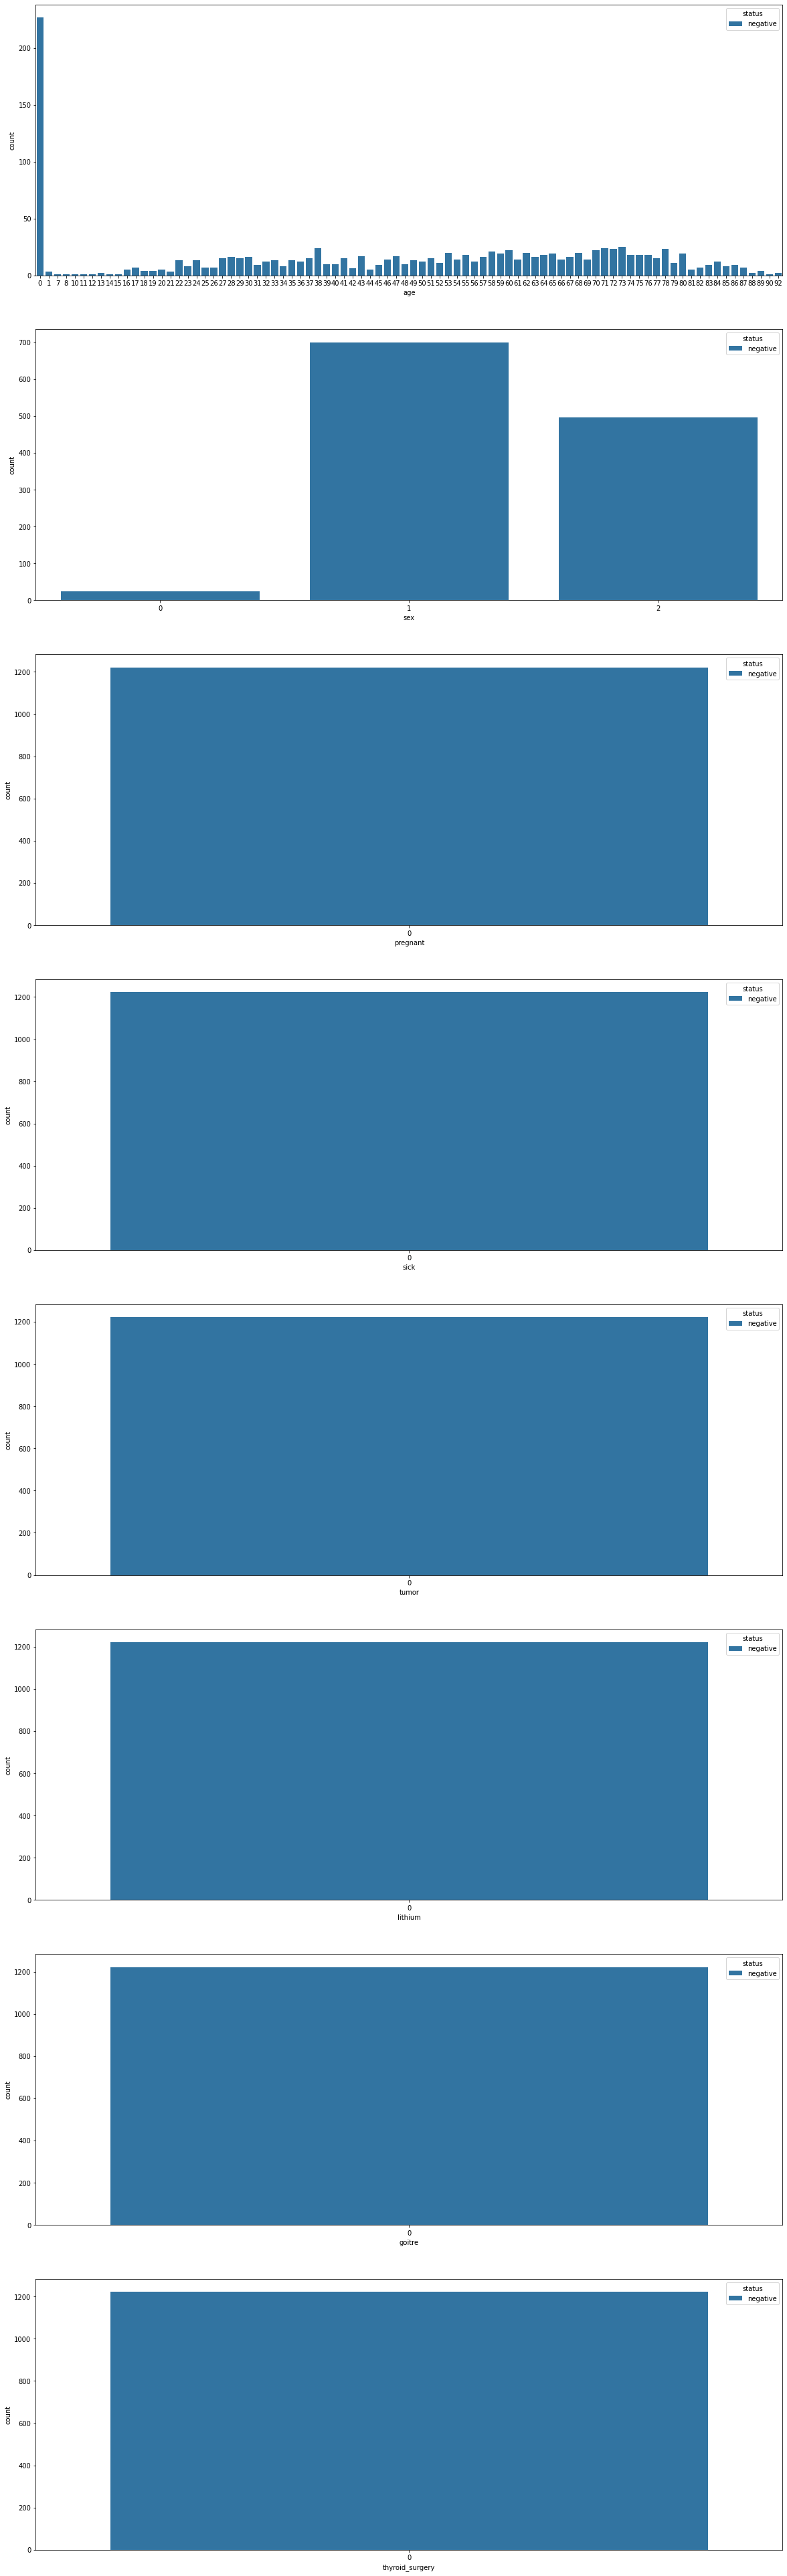

In [ ]:

# Plotting the univariate summaries and recording our observations
#
f, axes = plt.subplots(8, 1, figsize=[20, 70])

sns.countplot('age', hue= 'status', data=hypothyroid, ax=axes[0])
sns.countplot('sex', hue= 'status', data=hypothyroid, ax=axes[1])
sns.countplot('pregnant', hue= 'status', data=hypothyroid, ax=axes[2])
sns.countplot('sick', hue= 'status', data=hypothyroid, ax=axes[3])
sns.countplot('tumor', hue= 'status', data=hypothyroid, ax=axes[4])
sns.countplot('lithium', hue= 'status', data=hypothyroid, ax=axes[5])
sns.countplot('goitre', hue= 'status', data=hypothyroid, ax=axes[6])
sns.countplot('thyroid_surgery', hue= 'status', data=hypothyroid, ax=axes[7])


##Observations
#### Most of the patients who record high number of thyroid cases are children between ages 1-12 months as well as the highest number of negative cases.
#### Most of the patients who test negative for hypothyroidism are the female gender represented by code 2.
#### Most of the people who test positive for hypothyroid do not have tumors.

###Bivariate analysis

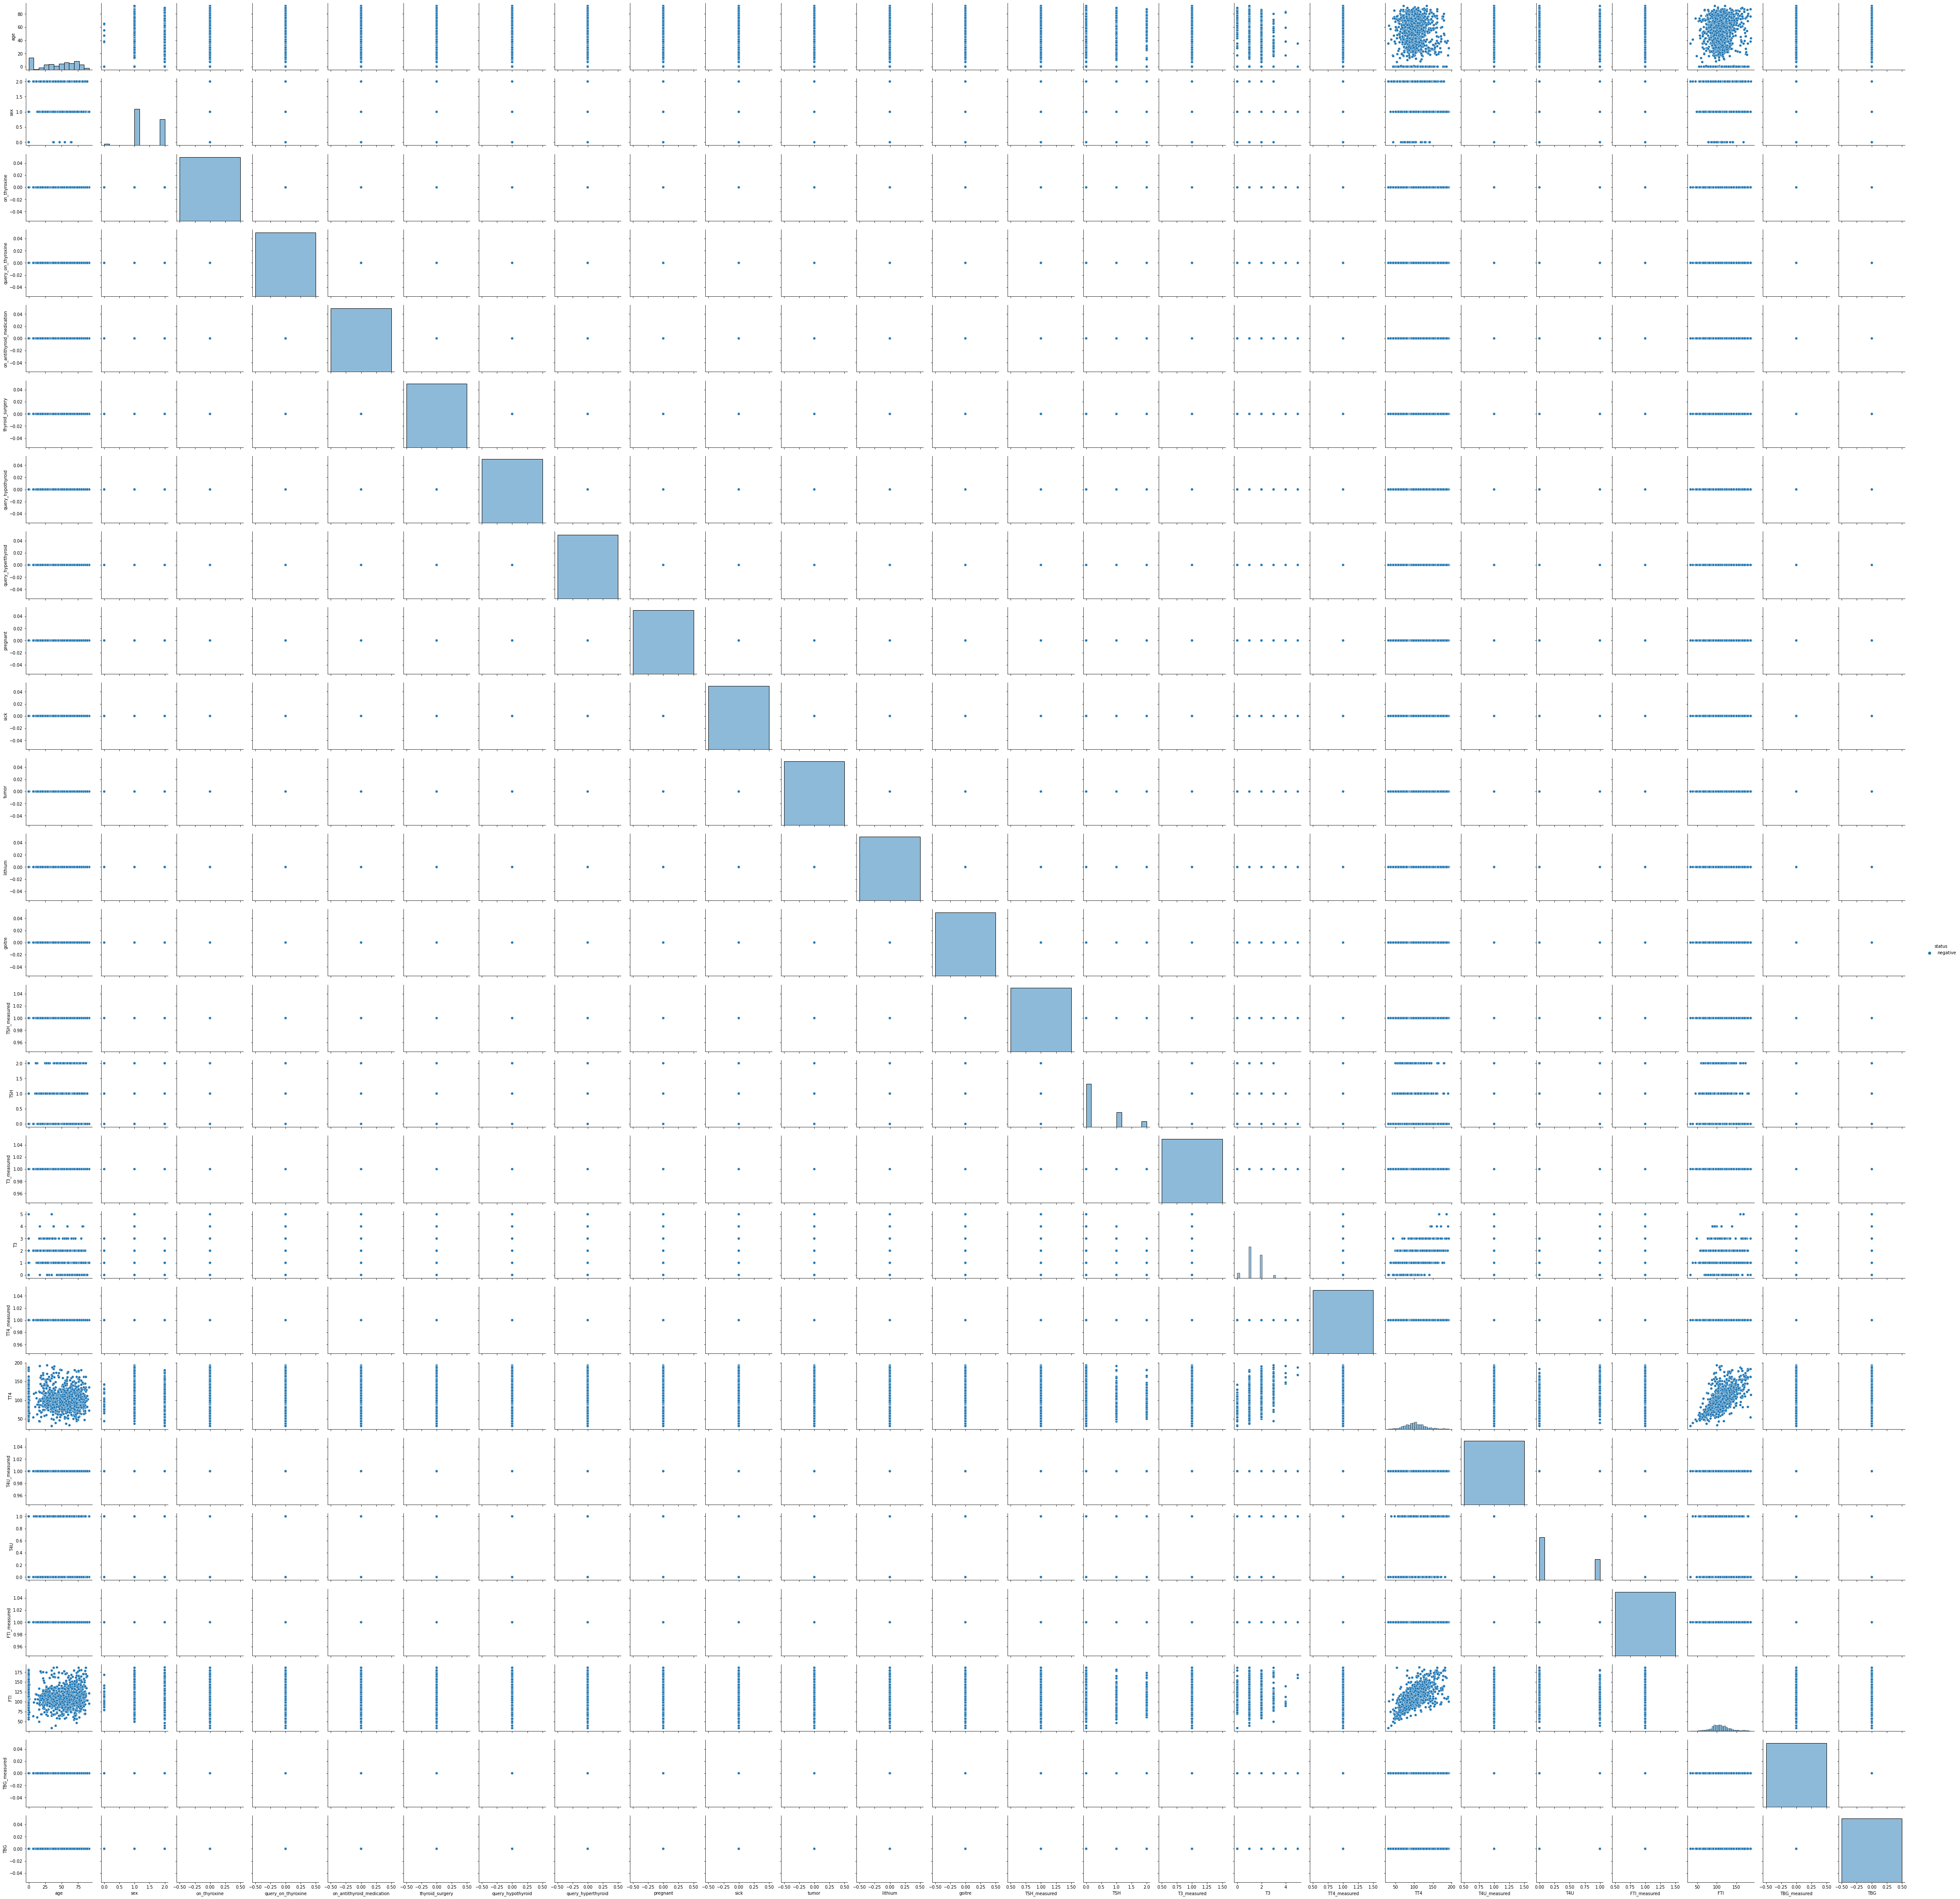

In [ ]:
g = sns.PairGrid(hypothyroid, hue="status")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

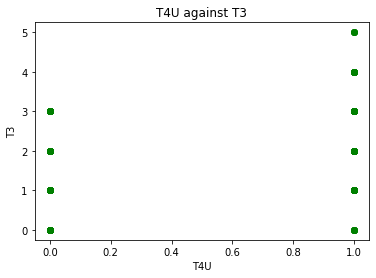

0.3526406891494668


In [ ]:
#now for some bivariate EDA
#plot relationship between T3 and T4U
import matplotlib.pyplot as plt
plt.scatter(hypothyroid['T4U'],hypothyroid['T3'],color = 'green')
plt.title('T4U against T3')
plt.xlabel('T4U')
plt.ylabel('T3')
plt.show()

coef = hypothyroid['T4U'].corr(hypothyroid['T3'])
print(coef)

#relatively moderate correlation between T3 and T4U

In [ ]:
#plot relationship between T3 and FTI
plt.scatter(hypothyroid['FTI'],hypothyroid['T3'],color = 'green')
plt.title('FTI against T3')
plt.xlabel('FTI')
plt.ylabel('T3')
plt.show()

coef = hypothyroid['FTI'].corr(hypothyroid['T3'])
print(coef)

# weak correlation between T3 and FTI

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


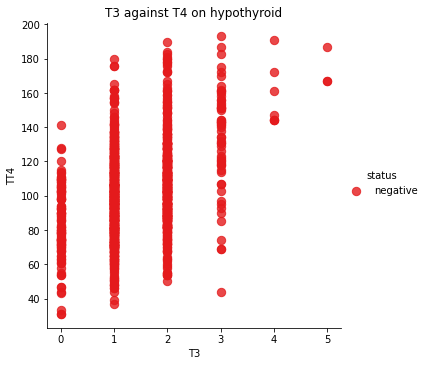

In [ ]:

#Multivariate analysis

sns.lmplot('T3','TT4',data = hypothyroid,palette='Set1',hue='status',fit_reg=False, scatter_kws={"s": 70})
plt.title('T3 against T4 on hypothyroid')

plt.show()

#T3 and T4 values are low for individuals with hypothyroid

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


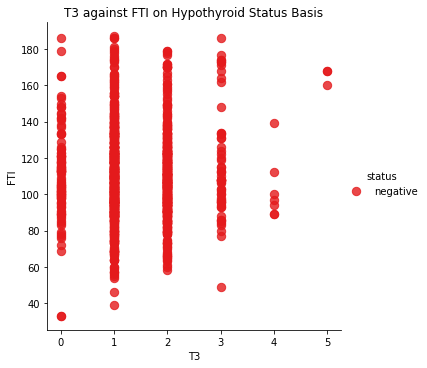

In [ ]:
import seaborn as sns
sns.lmplot('T3','FTI',data = hypothyroid,palette='Set1',hue='status',fit_reg=False, scatter_kws={"s": 70})
plt.title('T3 against FTI on Hypothyroid Status Basis')

plt.show()

#NB: the only cases of Hypothyroid have low levels of FTI and T3

###Encoding and Multicollinearity

In [3]:
#we start by encoding the data

enc = hypothyroid.dtypes == object
myenc = hypothyroid.columns[enc].tolist()

from sklearn.preprocessing import LabelEncoder

lenc = LabelEncoder()

hypothyroid[myenc] = hypothyroid[myenc].apply(lambda col:lenc.fit_transform(col))
hypothyroid.head(2)

NameError: ignored

In [ ]:
#after which we check for mutlicollinearity
data = hypothyroid.drop(columns=['status'])

# Let's display the correlations between the variables
correlations = data.corr()

correlations

### 5.) Implementing the solution

###Decision Trees

#### Random Forest

In [2]:
hypothyroid.head()

NameError: ignored

In [ ]:
hypothyroid['sex'].unique()

In [ ]:
# Describing the data

hypothyroid.describe()

In [ ]:
#build a Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

feat = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid','query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre','TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4','T4U_measured', 'T4U', 'FTI_measured', 'FTI']
X = hypothyroid[feat].values

y = hypothyroid['status'].values

In [ ]:
#split,train and test random forest model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

forest = RandomForestClassifier(n_estimators=100,random_state=42,criterion='gini',max_depth=5,min_samples_split=10)

forest = forest.fit(X_train,y_train)

mypred = forest.predict(X_test)

In [ ]:
#check accuracy of Random Forest model

from sklearn.metrics import accuracy_score

myaccu = accuracy_score(y_test,mypred)

myaccu * 100



The accuracy above is at 100% which is too high thus increasing the likelyhood of overfitting.

In [1]:
hypothyroid['status'].value_counts()

NameError: ignored

In [ ]:
#get specific tree from random forest
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feat,class_names = ['Pos','Neg'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hyperthyroid.png')
Image(graph.create_png())

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[10]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feat,class_names=['Pos','Neg'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hyperthyroid.png')
Image(graph.create_png())